In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
x_train = pd.read_csv("./Training Data/Linear_X_Train.csv", delimiter = ",")
y_train = pd.read_csv("./Training Data/Linear_Y_Train.csv", delimiter = ",")

In [8]:
x_train.shape, y_train.shape

((3750, 1), (3750, 1))

In [15]:
x_test = pd.read_csv("./Test Cases/Linear_X_Test.csv", delimiter = ",")

In [16]:
x_test.shape

(1250, 1)

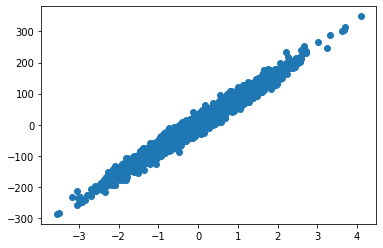

In [10]:
plt.scatter(x_train, y_train)
plt.show()

# From Skleearn

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
sk_pred = reg.predict(x_test)

In [20]:
reg.intercept_, reg.coef_

(array([3.72798828]), array([[80.54363185]]))

# From Gradient Descent

In [21]:
def error(x,y,m,b):
    return (((y-m*x-b)**2).sum()).mean()

In [27]:
def step_gradient(x,y,m,b,learning_rate):
    slope_m = 0
    slope_b = 0
    k = x.shape[0]
    for j in range(k):
        slope_m = (2/k)*(m*x[j]+b-y[j])*(x[j])
        slope_b = (2/k)*(m*x[j]+b-y[j])
        m = m - learning_rate*slope_m
        b = b - learning_rate*slope_b
    return m, b

In [50]:
def gradient_descent(x,y,num_epoches = 1000, learning_rate = 0.1):
    m = 0
    b = 0
    print("Start : ", error(x,y,m,b), "m : ", m, "b : ", b)
    for i in range(num_epoches):
        m, b = step_gradient(x, y, m, b, learning_rate)
        if(i % 100 == 0):
            print(i," : ", error(x,y,m,b), "m : ", m, "b : ", b)
    print("end : ", error(x,y,m,b), "m : ", m, "b : ", b)
    return m, b

In [51]:
def run(x,y):
    m, b = gradient_descent(x,y)
    return m, b

In [52]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train  = x_train.reshape(x_train.shape[0],)
y_train = y_train.reshape(y_train.shape[0],)

In [53]:
x_train.shape, y_train.shape

((3750,), (3750,))

In [54]:
m, b = run(x_train, y_train)

Start :  24661312.69673226 m :  0 b :  0
0  :  16873668.030442886 m :  14.387539955680827 b :  0.17367241781562956
100  :  716083.7524940188 m :  80.54614735404014 b :  3.7190428210877395
200  :  716083.7524894895 m :  80.54614759178412 b :  3.719042961984532
300  :  716083.7524894895 m :  80.54614759178412 b :  3.719042961984532
400  :  716083.7524894895 m :  80.54614759178412 b :  3.719042961984532
500  :  716083.7524894895 m :  80.54614759178412 b :  3.719042961984532
600  :  716083.7524894895 m :  80.54614759178412 b :  3.719042961984532
700  :  716083.7524894895 m :  80.54614759178412 b :  3.719042961984532
800  :  716083.7524894895 m :  80.54614759178412 b :  3.719042961984532
900  :  716083.7524894895 m :  80.54614759178412 b :  3.719042961984532
end :  716083.7524894895 m :  80.5461475917841 b :  3.719042961984531


In [55]:
m, b

(80.5461475917841, 3.719042961984531)

In [56]:
y_test = m*x_test+ b

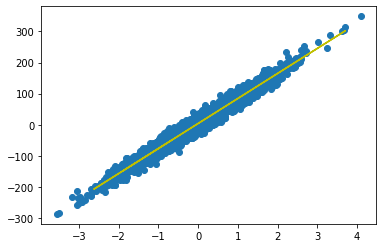

In [57]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_test, c = "y")
plt.show()

In [68]:
y_test.to_csv('results.csv', header = ['y'], index = False)

In [65]:
pd.DataFrame.to_csv?